In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

Coefficient 2
Bias/Intercept 1
Equation y = 2x+1

In [2]:
x_values = [i for i in range(11)]

In [3]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [5]:
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [6]:
y_values = [2 * i + 1 for i in x_values]

In [8]:
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [10]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [11]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [13]:
# input dimension is x, output dimension is y
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

### Instantiate Model Class

In [15]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

### Instantiate Loss Class

MSE Loss: Mean Squared Error

In [17]:
criterion = nn.MSELoss()

### Instantiate Optimizer Class

$ \theta = \theta - \eta * \nabla_\theta $

$\theta$ : parameters (our variables)

$\eta$ : learning rate (how fast we want to learn)

$\nabla_\theta$ : parameters' gradients

Or

parameters = parameters - learning_rate * parameters_gradients

In [18]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train Model

Process

1. Convert inputs/labels to variables
2. Clear gradient buffets (buffers?)
3. Get output given inputs
4. Get loss
5. Get gradients w.r.t. parameters
6. Update parameters using gradients
7. REPEAT

In [19]:
epochs = 100

In [20]:
for epoch in range(epochs):
    epoch += 1
    
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 177.41822814941406
epoch 2, loss 14.528583526611328
epoch 3, loss 1.2415492534637451
epoch 4, loss 0.1571379154920578
epoch 5, loss 0.06806215643882751
epoch 6, loss 0.060179565101861954
epoch 7, loss 0.058926597237586975
epoch 8, loss 0.05822118744254112
epoch 9, loss 0.05756707489490509
epoch 10, loss 0.056923963129520416
epoch 11, loss 0.056288279592990875
epoch 12, loss 0.05565967410802841
epoch 13, loss 0.05503818020224571
epoch 14, loss 0.054423537105321884
epoch 15, loss 0.053815748542547226
epoch 16, loss 0.053214870393276215
epoch 17, loss 0.05262066051363945
epoch 18, loss 0.05203293636441231
epoch 19, loss 0.05145193636417389
epoch 20, loss 0.050877440720796585
epoch 21, loss 0.05030927434563637
epoch 22, loss 0.04974745586514473
epoch 23, loss 0.049191948026418686
epoch 24, loss 0.048642635345458984
epoch 25, loss 0.04809940233826637
epoch 26, loss 0.04756234586238861
epoch 27, loss 0.047031186521053314
epoch 28, loss 0.04650605097413063
epoch 29, loss 0.04598

C:\Users\e.istre91\Anaconda3\envs\pyt-gpu\lib\site-packages\ipykernel\__main__.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [22]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.7322416],
       [ 2.7708013],
       [ 4.809361 ],
       [ 6.8479204],
       [ 8.88648  ],
       [10.92504  ],
       [12.963599 ],
       [15.002159 ],
       [17.040718 ],
       [19.079277 ],
       [21.117838 ]], dtype=float32)

In [23]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

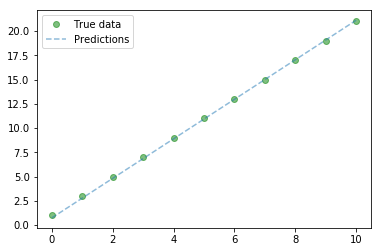

In [25]:
plt.clf()

plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

plt.legend(loc='best')
plt.show()

### Save Model

In [ ]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

In [ ]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

### GPU

2 things must be on gpu
 - model
 - variables

In [26]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

'''
CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

model.cuda()

'''
INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    if torch.cuda.is_available():
        labels = Variable(torch.from_numpy(y_train).cuda())
        
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 191.89048767089844
epoch 2, loss 16.033597946166992
epoch 3, loss 1.6852434873580933
epoch 4, loss 0.5106783509254456
epoch 5, loss 0.41070544719696045
epoch 6, loss 0.3984297811985016
epoch 7, loss 0.3933533728122711
epoch 8, loss 0.38890978693962097
epoch 9, loss 0.3845627009868622
epoch 10, loss 0.3802678883075714
epoch 11, loss 0.3760213851928711
epoch 12, loss 0.37182244658470154
epoch 13, loss 0.36767056584358215
epoch 14, loss 0.36356475949287415
epoch 15, loss 0.3595049977302551
epoch 16, loss 0.3554903566837311
epoch 17, loss 0.3515208065509796
epoch 18, loss 0.3475952446460724
epoch 19, loss 0.3437137305736542
epoch 20, loss 0.3398754894733429
epoch 21, loss 0.3360801935195923
epoch 22, loss 0.33232709765434265
epoch 23, loss 0.3286161422729492
epoch 24, loss 0.3249466121196747
epoch 25, loss 0.3213178217411041
epoch 26, loss 0.3177298605442047
epoch 27, loss 0.3141818046569824
epoch 28, loss 0.3106732666492462
epoch 29, loss 0.30720406770706177
epoch 30, loss 0

C:\Users\e.istre91\Anaconda3\envs\pyt-gpu\lib\site-packages\ipykernel\__main__.py:91: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
